# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../regression_pipeline")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from data_preparation import load_dataset, prepare_data, get_data_arrays
from data_evaluation import get_predictions_cv, get_score_cv
from feature_engineering import (
    select_pca_features,
    select_forward_features,
    select_backward_features,
    select_polynomial_features,
    select_correlation_features,
)
from models import (
    linear_regression,
    lasso_regression,
    ridge_regression,
    elastic_net_regression,
)

sns.set()

In [3]:
plt.rcParams['figure.figsize'] = [20, 20]

# Load and prepare the Dataset

In [4]:
dataset_filename = "../../datasets/boston_housing.csv"
dataset_df = load_dataset(dataset_filename)
prepare_data(dataset_df)
n_samples, n_features = dataset_df.shape

In [5]:
X, y_true = get_data_arrays(dataset_df)
X_pca, _ = get_data_arrays(select_pca_features(dataset_df))
X_corr, _ = get_data_arrays(select_correlation_features(dataset_df))

X_polynomial, _ = get_data_arrays(select_forward_features(dataset_df))
X_polynomial_pca, _ = get_data_arrays(select_forward_features(select_pca_features(dataset_df)))
X_polynomial_corr, _ = get_data_arrays(select_forward_features(select_correlation_features(dataset_df)))

X_forward, _ = get_data_arrays(select_forward_features(dataset_df))
X_forward_pca, _ = get_data_arrays(select_forward_features(select_pca_features(dataset_df)))
X_forward_corr, _ = get_data_arrays(select_forward_features(select_correlation_features(dataset_df)))

X_backward, _ = get_data_arrays(select_backward_features(dataset_df))
X_backward_pca, _ = get_data_arrays(select_backward_features(select_pca_features(dataset_df)))
X_backward_corr, _ = get_data_arrays(select_backward_features(select_correlation_features(dataset_df)))

Add LSTAT      - p-value 1.20E-82
Add RM         - p-value 2.93E-29
Add PTRATIO    - p-value 2.01E-14
Add B          - p-value 8.05E-05
Add DIS        - p-value 3.25E-05
Add NOX        - p-value 2.12E-07
Add CHAS       - p-value 2.37E-04
Add ZN         - p-value 1.27E-02
Add CRIM       - p-value 2.34E-02
Add RAD        - p-value 6.34E-03
Add TAX        - p-value 6.77E-04
Add PC3        - p-value 5.91E-37
Add PC0        - p-value 3.08E-41
Add PC2        - p-value 1.54E-39
Add PC5        - p-value 9.86E-17
Add PC1        - p-value 7.72E-06
Add PC4        - p-value 4.86E-02
Add LSTAT      - p-value 1.20E-82
Add RM         - p-value 2.93E-29
Add PTRATIO    - p-value 2.01E-14
Add LSTAT      - p-value 1.20E-82
Add RM         - p-value 2.93E-29
Add PTRATIO    - p-value 2.01E-14
Add B          - p-value 8.05E-05
Add DIS        - p-value 3.25E-05
Add NOX        - p-value 2.12E-07
Add CHAS       - p-value 2.37E-04
Add ZN         - p-value 1.27E-02
Add CRIM       - p-value 2.34E-02
Add RAD       

In [6]:
index_train, index_test = train_test_split(np.arange(n_samples))

y_train, y_test = y_true[index_train], y_true[index_test]

x_train, x_test = X[index_train], X[index_test]
x_pca_train, x_pca_test = X_pca[index_train], X_pca[index_test]
x_corr_train, x_corr_test = X_corr[index_train], X_corr[index_test]

x_polynomial_train, x_polynomial_test = X_polynomial[index_train], X_polynomial[index_test]
x_polynomial_pca_train, x_polynomial_pca_test = X_polynomial_pca[index_train], X_polynomial_pca[index_test]
x_polynomial_corr_train, x_polynomial_corr_test = X_polynomial_corr[index_train], X_polynomial_corr[index_test]

x_forward_train, x_forward_test = X_forward[index_train], X_forward[index_test]
x_forward_pca_train, x_forward_pca_test = X_forward_pca[index_train], X_forward_pca[index_test]
x_forward_corr_train, x_forward_corr_test = X_forward_corr[index_train], X_forward_corr[index_test]

x_backward_train, x_backward_test = X_backward[index_train], X_backward[index_test]
x_backward_pca_train, x_backward_pca_test = X_backward_pca[index_train], X_backward_pca[index_test]
x_backward_corr_train, x_backward_corr_test = X_backward_corr[index_train], X_backward_corr[index_test]

In [7]:
model_names = [
    "linear", "linear_pca", "linear_corr", 
    "lasso", "lasso_pca", "lasso_corr", 
    "ridge", "ridge_pca", "ridge_corr", 
    "elasticnet", "elasticnet_pca", "elasticnet_corr", 
    "polynomial", "polynomial_pca", "polynomial_corr", 
    "forward", "forward_pca", "forward_corr", 
    "backward", "backward_pca", "backward_corr", 
]

model_callables = [
    linear_regression, linear_regression, linear_regression, 
    lasso_regression, lasso_regression, lasso_regression,
    ridge_regression, ridge_regression, ridge_regression, 
    elastic_net_regression, elastic_net_regression, elastic_net_regression,
    linear_regression, linear_regression, linear_regression, 
    linear_regression, linear_regression, linear_regression, 
    linear_regression, linear_regression, linear_regression, 
]

X_train = [
    x_train, x_pca_train, x_pca_train, 
    x_train, x_pca_train, x_pca_train, 
    x_train, x_pca_train, x_pca_train, 
    x_train, x_pca_train, x_pca_train, 
    x_polynomial_train, x_polynomial_pca_train, x_polynomial_pca_train,
    x_forward_train, x_forward_pca_train, x_forward_pca_train,
    x_backward_train, x_backward_pca_train, x_backward_pca_train,
]

X_test = [
    x_test, x_pca_test, x_pca_test,
    x_test, x_pca_test, x_pca_test,
    x_test, x_pca_test, x_pca_test,
    x_test, x_pca_test, x_pca_test,
    x_polynomial_test, x_polynomial_pca_test, x_polynomial_pca_test,
    x_forward_test, x_forward_pca_test, x_forward_pca_test,
    x_backward_test, x_backward_pca_test, x_backward_pca_test,
]

X_all = [
    X, X_pca, X_corr,
    X, X_pca, X_corr,
    X, X_pca, X_corr,
    X, X_pca, X_corr,
    X_polynomial, X_polynomial_pca, X_polynomial_corr,
    X_forward, X_forward_pca, X_forward_corr,
    X_backward, X_backward_pca, X_backward_corr,
]

# Run models

In [ ]:
min_true = y_test.min()
max_true = y_test.max()
std_true = y_test.std()
min_max = [min_true, max_true]
add_std = [min_true + std_true, max_true + std_true]
sub_std = [min_true - std_true, max_true - std_true]

fig, axs = plt.subplots(7, 3)
fig.subplots_adjust(hspace = .5, wspace=.4)

axs = axs.ravel()
Y_pred = []
MSE, r2 = [], []
n_splits = 5
MSE_cv, r2_cv = pd.DataFrame(), pd.DataFrame()
for i in range(len(model_names)):
    model = model_callables[i]()
    name = model_names[i]
    
    model.fit(X_train[i], y_train)
    Y_pred.append(model.predict(X_test[i]))
    
    MSE.append(mean_squared_error(Y_pred[i], y_test))
    r2.append(r2_score(Y_pred[i], y_test))
    
    axs[i].scatter(y_test, Y_pred[i], color="#377eb8")
    axs[i].plot(min_max, min_max, color="#e41a1c", lw=3)
    axs[i].fill_between(min_max, add_std, sub_std,color="#e41a1c", alpha=0.2)
    axs[i].set_ylabel(f'y_{name}_pred')
    axs[i].set_xlabel('y_true')
    
    _, _, _, test, pred = get_predictions_cv(X_all[i], y_true, model, n_splits)
    scores = get_score_cv(test, pred, markdown=False)
    
    MSE_cv = pd.concat([MSE_cv, scores["MSE"][:-3]], axis=1, ).rename(columns={"MSE": name})
    r2_cv = pd.concat([r2_cv, scores["r2"][:-3]], axis=1, ).rename(columns={"r2": name})
    
plt.tight_layout()
plt.savefig("../../images/correlationplot_housing.png", format="png")

In [9]:
scores_df = pd.DataFrame.from_dict(
    {"model_names": model_names, "MSE": MSE, "r2": r2}
).set_index("model_names")

scores_df.sort_values(by="MSE")

,MSE,r2
model_names,,
ridge,0.328307,0.585091
linear,0.328616,0.586149
backward,0.328923,0.585442
forward,0.328923,0.585442
polynomial,0.328923,0.585442
elasticnet,0.333810,0.463946
elasticnet_corr,0.345789,0.471463
elasticnet_pca,0.345789,0.471463
lasso_corr,0.349452,0.374014


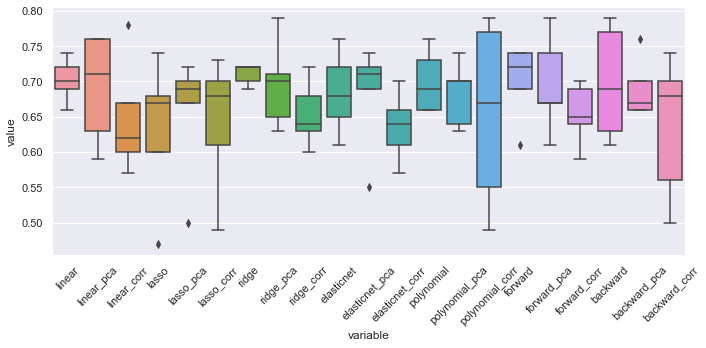

In [20]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.boxplot(x="variable", y="value", data=pd.melt(r2_cv))
plt.tight_layout()
plt.savefig("../../images/boxplot_housing.png", format="png")